# importing neccessery libriries


In [1]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score

# Importing CSV and Analyzing Data

In [2]:
df = pd.read_csv('red_wine_ml.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red wine
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red wine
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red wine
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red wine
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low,red wine
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,red wine
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,red wine
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low,red wine


In [3]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type'],
      dtype='object')

In [4]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_label         1599 non-null   object 
 13  wine_type             1599 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 175.0+ KB


In [6]:
df.duplicated().sum()

np.int64(240)

In [7]:
string_col = df.select_dtypes(include="object").columns
df[string_col].head()

,quality_label,wine_type
0,low,red wine
1,low,red wine
2,low,red wine
3,medium,red wine
4,low,red wine


In [8]:
for col in string_col:
    print(f"The distribution of categorical values in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical values in the quality_label is : 
quality_label
medium    837
low       744
high       18
Name: count, dtype: int64
The distribution of categorical values in the wine_type is : 
wine_type
red wine    1599
Name: count, dtype: int64


# Checking Outliers

In [9]:
dfm = df.copy()

In [10]:


q1fa = np.percentile(dfm.fixed_acidity, 25)
q3fa = np.percentile(dfm.fixed_acidity, 75)
print(q1fa)
print(q3fa)
iqrfa = q3fa - q1fa
print(iqrfa)
lower_treshold_fa = q1fa - (1.5*iqrfa)
print(lower_treshold_fa)
higher_treshold_fa = q3fa + (1.5*iqrfa)
print(higher_treshold_fa)
print('----------')

q1cl = np.percentile(dfm.chlorides, 25)
q3cl = np.percentile(dfm.chlorides, 75)
print(q1cl)
print(q3cl)
iqrcl = q3cl - q1cl
print(iqrcl)
lower_treshold_cl = q1cl - (1.5*iqrcl)
print(lower_treshold_cl)
higher_treshold_cl = q3cl + (1.5*iqrcl)
print(higher_treshold_cl)
print('----------')


q1su = np.percentile(dfm.sulphates, 25)
q3su = np.percentile(dfm.sulphates, 75)
print(q1su)
print(q3su)
iqrsu = q3su - q1su
print(iqrsu)
lower_treshold_su = q1su - (1.5*iqrsu)
print(lower_treshold_su)
higher_treshold_su = q3su + (1.5*iqrsu)
print(higher_treshold_su)


7.1
9.2
2.0999999999999996
3.95
12.349999999999998
----------
0.07
0.09
0.01999999999999999
0.04000000000000002
0.11999999999999998
----------
0.55
0.73
0.17999999999999994
0.28000000000000014
0.9999999999999999


# Removing Outliers

In [11]:
dfm_clean = dfm[
    (dfm['fixed_acidity'] >= lower_treshold_fa) & (dfm['fixed_acidity'] <= higher_treshold_fa)
]
dfm_clean = dfm[
    (df['chlorides'] >= lower_treshold_cl) & (df['chlorides'] <= higher_treshold_cl)
]
dfm_clean = dfm[
    (df['sulphates'] >= lower_treshold_su) & (df['sulphates'] <= higher_treshold_su)
]

dfm_clean.head(20)
dfm.info()
print('---')
dfm_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_label         1599 non-null   object 
 13  wine_type             1599 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 175.0+ KB
---
<class '

# Machine Starts

In [12]:
dfm_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
# I actually should drop wine type as we do not need it. 
# dfm.drop('quality_label', axis=1)
dfm_clean['wine_type'].replace({'white wine':0, 'red wine':1}, inplace=True)

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_20484/788181162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfm_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_20484/788181162.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [13]:
dfm_clean.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X = dfm_clean.drop(['quality_label', 'quality', 'density', 'chlorides', 'wine_type', 'free_sulfur_dioxide', 'pH', 'sulphates', 'free_sulfur_dioxide'], axis=1)
y = dfm_clean['quality_label']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
y_test.shape

(308,)

In [16]:
x_test.shape

(308, 6)

# Robust Scaler

In [17]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,total_sulfur_dioxide,alcohol
184,6.7,0.620,0.21,1.9,62.0,9.3
1166,9.9,0.540,0.26,2.0,60.0,10.2
33,6.9,0.605,0.12,10.7,83.0,9.4
202,6.8,0.500,0.11,1.5,49.0,9.5
1019,7.0,0.500,0.14,1.8,23.0,10.4
...,...,...,...,...,...,...
1294,8.2,0.635,0.10,2.1,60.0,10.9
434,10.4,0.410,0.55,3.2,54.0,9.9
1094,6.6,0.725,0.09,5.5,17.0,10.8
1242,9.0,0.400,0.41,2.0,40.0,12.2


In [18]:
# data normalization with sklearn using RobustScaler
from sklearn.preprocessing import RobustScaler

# fit scaler on training data
scaler = RobustScaler().fit(x_train)

# transform training data
x_train = scaler.transform(x_train)

# transform testing data
x_test = scaler.transform(x_test)


# Training and Evaluating models with a For Loop

Training LR...
Accuracy for LR: 0.6818
Cohen's Kappa for LR: 0.3724
              precision    recall  f1-score   support

         low       0.67      0.67      0.67       141
      medium       0.69      0.71      0.70       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308

-------
ROC AUC for LR: 0.8146
Log Loss for LR: 0.6297


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

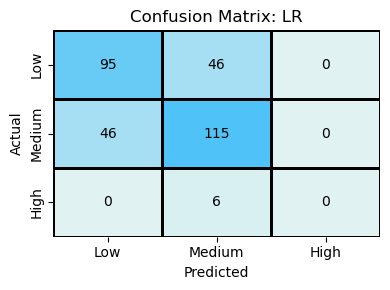

Training DTC...
Accuracy for DTC: 0.7143
Cohen's Kappa for DTC: 0.4457
              precision    recall  f1-score   support

         low       0.69      0.74      0.71       141
      medium       0.74      0.71      0.72       161
        high       0.50      0.33      0.40         6

    accuracy                           0.71       308
   macro avg       0.64      0.59      0.61       308
weighted avg       0.71      0.71      0.71       308

-------
ROC AUC for DTC: 0.7041
Log Loss for DTC: 10.2982


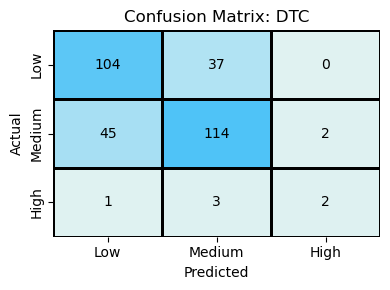

Training GNB...
Accuracy for GNB: 0.6558
Cohen's Kappa for GNB: 0.3240
              precision    recall  f1-score   support

         low       0.64      0.68      0.66       141
      medium       0.68      0.66      0.67       161
        high       0.00      0.00      0.00         6

    accuracy                           0.66       308
   macro avg       0.44      0.45      0.44       308
weighted avg       0.64      0.66      0.65       308

-------
ROC AUC for GNB: 0.8005
Log Loss for GNB: 0.7618


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

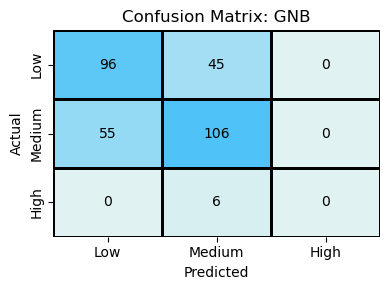

Training RF...
Accuracy for RF: 0.7500
Cohen's Kappa for RF: 0.5073
              precision    recall  f1-score   support

         low       0.76      0.72      0.74       141
      medium       0.74      0.80      0.77       161
        high       1.00      0.17      0.29         6

    accuracy                           0.75       308
   macro avg       0.83      0.56      0.60       308
weighted avg       0.75      0.75      0.75       308

-------
ROC AUC for RF: 0.8992
Log Loss for RF: 0.5048


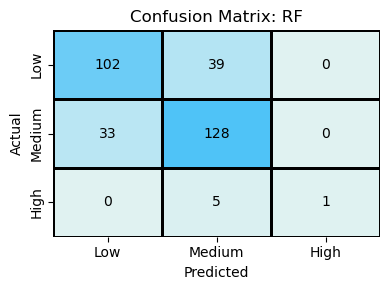

Training SVC...
Accuracy for SVC: 0.6818
Cohen's Kappa for SVC: 0.3719
              precision    recall  f1-score   support

         low       0.68      0.67      0.67       141
      medium       0.69      0.72      0.70       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308

-------
ROC AUC for SVC: 0.8189
Log Loss for SVC: 0.6360


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

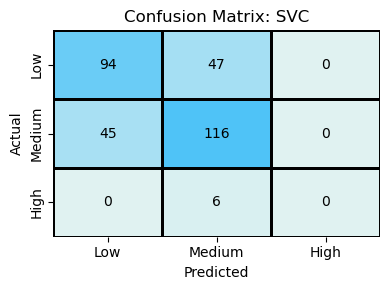

Training KNC...
Accuracy for KNC: 0.6981
Cohen's Kappa for KNC: 0.4032
              precision    recall  f1-score   support

         low       0.70      0.67      0.69       141
      medium       0.70      0.75      0.72       161
        high       0.00      0.00      0.00         6

    accuracy                           0.70       308
   macro avg       0.47      0.47      0.47       308
weighted avg       0.68      0.70      0.69       308

-------
ROC AUC for KNC: 0.7335
Log Loss for KNC: 2.5420


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

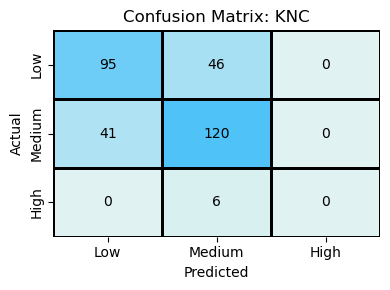

Training MLPC...
Accuracy for MLPC: 0.6753
Cohen's Kappa for MLPC: 0.3607
              precision    recall  f1-score   support

         low       0.66      0.68      0.67       141
      medium       0.69      0.70      0.69       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.45       308
weighted avg       0.66      0.68      0.67       308

-------
ROC AUC for MLPC: 0.8303
Log Loss for MLPC: 0.6081


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-pa

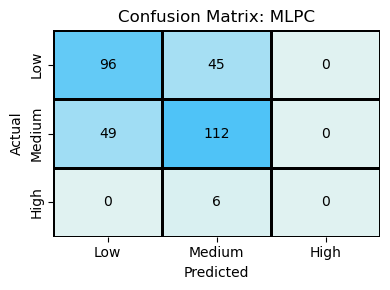

Summary of Cohen's Kappa scores:
LR has Fair agreement with a Kappa value of 0.3724218230206253
DTC has Good agreement with a Kappa value of 0.4456806282722514
GNB has Fair agreement with a Kappa value of 0.3240019877422561
RF has Good agreement with a Kappa value of 0.5072614323409029
SVC has Fair agreement with a Kappa value of 0.3718994506409189
KNC has Good agreement with a Kappa value of 0.40320026668889075
MLPC has Fair agreement with a Kappa value of 0.3606775157754899
Summary of ROC AUC scores:
LR has a Good ROC AUC score of 0.6297
DTC has a Poor ROC AUC score of 10.2982 (high loss)
GNB has a Fair ROC AUC score of 0.7618
RF has a Good ROC AUC score of 0.5048
SVC has a Good ROC AUC score of 0.6360
KNC has a Poor ROC AUC score of 2.5420 (high loss)
MLPC has a Good ROC AUC score of 0.6081
Summary of Log Loss scores:
LR has a Very Good Log Loss score of 0.8146
DTC has a Good Log Loss score of 0.7041
GNB has a Very Good Log Loss score of 0.8005
RF has a Very Good Log Loss score of 0

In [19]:
models = {
    'LR': LogisticRegression(random_state=42, max_iter=100),
    'DTC': DecisionTreeClassifier(random_state=42),
    'GNB': GaussianNB(),
    'RF': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),  # set probability=True for roc_auc_score
    'KNC': KNeighborsClassifier(),
    'MLPC': MLPClassifier(random_state=42, max_iter=300),
}

kappa_scores = {}
roc_auc_scores = {}
log_loss_scores = {}

print('=====================')

# for name, model in models.items():
#     print(f"Running CV for {name}...")
    
#     preds = cross_val_predict(model, X, y, cv=cv, method='predict')
    
#     if hasattr(model, "predict_proba"):
#         probs = cross_val_predict(model, X, y, cv=cv, method='predict_proba')
#     else:
#         probs = None

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)

    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    kappa = cohen_kappa_score(y_test, preds)

    print(f"Accuracy for {name}: {acc:.4f}")
    print(f"Cohen's Kappa for {name}: {kappa:.4f}")
    print(classification_report(y_test, preds, target_names=["low", "medium", "high"]))
    print('-------')

    kappa_scores[name] = kappa

    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(x_test)
        try:
            roc_auc = roc_auc_score(y_test, probs, multi_class='ovr')
            print(f"ROC AUC for {name}: {roc_auc:.4f}")
            roc_auc_scores[name] = roc_auc
            loss = log_loss(y_test, probs)
            log_loss_scores[name] = loss
            print(f"Log Loss for {name}: {loss:.4f}")
        except Exception as e:
            print(f"Could not calculate ROC AUC and Log Loss for {name}: {e}")
    else:
        print(f"{name} does not support predict_proba, skipping ROC AUC.")

    print('=====================')
    
    cm = confusion_matrix(y_test, preds)
    cm_df = pd.DataFrame(cm, index=["Low", "Medium", "High"], columns=["Low", "Medium", "High"])
    
    light_blues = LinearSegmentedColormap.from_list("light_blues", ["#E0F2F1", "#4FC3F7"])


    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap=light_blues, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
    plt.title(f'Confusion Matrix: {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
    
    print('=====================')

print("Summary of Cohen's Kappa scores:")
for name, score in kappa_scores.items():
    if score < 0.20:
        print(f'{name} has Poor agreement with a Kappa value of {score}') 
    elif 0.20 <= score < 0.40:
        print(f'{name} has Fair agreement with a Kappa value of {score}') 
    elif 0.40 <= score < 0.60:
        print(f'{name} has Good agreement with a Kappa value of {score}')
    else:
        print(f'{name} has Very good agreement with a Kappa value of {score}') 


print('=====================')


print("Summary of ROC AUC scores:")
for name, score in log_loss_scores.items():
    if score > 1.0:
        print(f'{name} has a Poor ROC AUC score of {score:.4f} (high loss)')
    elif 0.75 < score <= 1.0:
        print(f'{name} has a Fair ROC AUC score of {score:.4f}')
    elif 0.5 < score <= 0.75:
        print(f'{name} has a Good ROC AUC score of {score:.4f}')
    elif 0.25 < score <= 0.5:
        print(f'{name} has a Very Good ROC AUC score of {score:.4f}')
    else:
        print(f'{name} has an Excellent ROC AUC score of {score:.4f} (low loss)')


print('=====================')


print("Summary of Log Loss scores:")
for name, score in roc_auc_scores.items():
    if score < 0.60:
        print(f'{name} has a Poor Log Loss score of {score:.4f}')
    elif 0.60 <= score < 0.70:
        print(f'{name} has a Fair Log Loss score of {score:.4f}')
    elif 0.70 <= score < 0.80:
        print(f'{name} has a Good Log Loss score of {score:.4f}')
    elif 0.80 <= score < 0.90:
        print(f'{name} has a Very Good Log Loss score of {score:.4f}')
    else:
        print(f'{name} has an Excellent Log Loss score of {score:.4f}')
        
print('=====================')


print("Final Thoughts:")
for name in models.keys():
    scoreroc = roc_auc_scores.get(name)
    scorekap = kappa_scores.get(name)
    scorelog = log_loss_scores.get(name)

    if scoreroc is not None and scorekap is not None and scorelog is not None:
        if scoreroc >= 0.80 and scorekap >= 0.60 and scorelog <= 0.5:
            print(f"{name} is an excellent choice.")
        elif scoreroc >= 0.70 and scorekap >= 0.40 and scorelog <= 0.75:
            print(f"{name} is a good choice.")
        else:
            print(f"{name} might not be reliable enough.")
    else:
        print(f"{name} is missing score data.")

    

# CV

In [20]:
RF = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RF, x_train, y_train, cv=cv, scoring='accuracy')
mean_score = scores.mean()
print(f"RF CV Accuracy Scores: {scores}")
print(f"RF CV Accuracy Mean: {mean_score: .4f}")

RF CV Accuracy Scores: [0.76923077 0.78137652 0.80081301 0.71544715 0.79268293]
RF CV Accuracy Mean:  0.7719


# Hyperparameter w/ CV Included

In [21]:
RF = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv)

grid.fit(x_train, y_train)
print(grid.best_params_)
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


{'max_features': np.int64(2), 'n_estimators': np.int64(50)}
The best parameters are {'max_features': np.int64(2), 'n_estimators': np.int64(50)} with a score of 0.79


In [22]:
print(grid.best_params_)

{'max_features': np.int64(2), 'n_estimators': np.int64(50)}


In [23]:
import numpy as np
import sklearn
import sys

print("NumPy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)
print("Python version:", sys.version)


NumPy version: 2.2.6
scikit-learn version: 1.7.1
Python version: 3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:46:00) [Clang 18.1.8 ]
